In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Captain of His Soul,1918
1,Qing chun xing,1975
2,Tangled Web (II),2008
3,The Shepherd of the Hills,1919
4,Anna mit'n Flimmerfimmel,1919


In [5]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

<AxesSubplot:xlabel='year'>

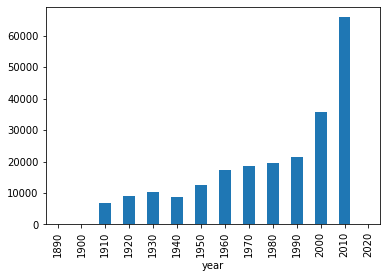

In [79]:
t = titles
t[t.year // 10 <= 202].groupby(t.year // 10 * 10).size().plot(kind = 'bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

<AxesSubplot:xlabel='year'>

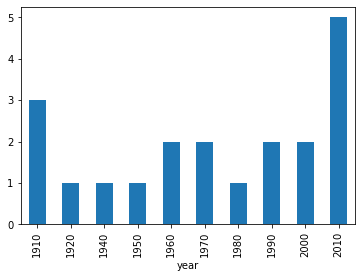

In [82]:
t[t.title == 'Hamlet'].groupby(t.year // 10 * 10).size().plot(kind = 'bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [87]:
c = cast
c[(c.year // 10 == 195) & (c.n == 1)].type.value_counts()

actor      6482
actress    2985
Name: type, dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [92]:
c[(c.year // 10 == 195) & (c.n >= 1) & (c.n <= 5)].groupby(['n', 'type']).size()

n    type   
1.0  actor      6482
     actress    2985
2.0  actor      4520
     actress    4496
3.0  actor      5489
     actress    3109
4.0  actor      5479
     actress    2820
5.0  actor      5493
     actress    2531
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [8]:
c = cast
c[c.title == 'The Pink Panther'].sort_values('n').groupby(['year']).n.max()

year
1963    15.0
2006    50.0
Name: n, dtype: float64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [103]:
s = c[c.name == 'Frank Oz'].groupby(['year', 'title']).size()
s[s > 1]

year  title                               
1979  The Muppet Movie                        8
1981  The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [104]:
g = c[c.name == 'Frank Oz']. groupby(['character']).size()
g[g > 1]

character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        5
Sam the Eagle     5
Yoda              6
dtype: int64

In [6]:
%%time
cast[cast.title == 'Sleuth']

CPU times: user 264 ms, sys: 6.39 ms, total: 271 ms
Wall time: 268 ms


,title,year,name,type,character,n
238747,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
299291,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
299292,Sleuth,2007,Michael Caine,actor,Andrew,1.0
342151,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
342152,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
1183659,Sleuth,2007,Jude Law,actor,Milo,2.0
1325945,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
1341313,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
1560814,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
1652936,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0


In [41]:
c = cast.set_index(['title', 'year']).sort_index()
c

name     type       character  \
title                   year                                                
#211                    2018        Sapir Azulay  actress          Jacobs   
                        2018              Bleona  actress       Christine   
                        2018        Amanda Cerny  actress           Sarah   
                        2018     Mackenzie Evans  actress            Girl   
                        2018       Liza Mircheva  actress  Elizabeth Grey   
...                                          ...      ...             ...   
xXx: State of the Union 2005    Deborah S. Smith  actress  Business Woman   
                        2005       Gina St. John  actress  Field Reporter   
                        2005  Paola (III) Torres  actress    DC Executive   
                        2005      Samantha Tyler  actress   Corvette Girl   
                        2005  Gay-Yee Westerhoff  actress  String Quartet   

                                 n  
title                   year        
#211                    2018   NaN  
                        2018   NaN  
                        2018   9.0  
                        2018   NaN  
                        2018   NaN  
...                            ...  
xXx: State of the Union 2005   NaN  
                        2005  28.0  
                        2005   NaN  
                        2005  38.0  
                        2005   NaN  

[3442902 rows x 4 columns]

In [43]:
%%time
c.loc['Hamlet', 2017]

CPU times: user 25.3 ms, sys: 8.89 ms, total: 34.2 ms
Wall time: 32.3 ms


name     type                 character   n
title  year                                                               
Hamlet 2017           Luing Andrews    actor                  Bernardo NaN
       2017                Taz Bear    actor               Royal Hound NaN
       2017        Andrew Calverley    actor                  Polonius NaN
       2017               Tom Clear    actor                    Hamlet NaN
       2017        Dave Taff Culver    actor              Guildenstern NaN
       2017               Obie Dean    actor                  Claudius NaN
       2017           Dick Douglass    actor  Ghost Of Hamlet's Father NaN
       2017           Owen Llewelyn    actor               Rosencrantz NaN
       2017      Daniel (II) Lovett    actor                   Laertes NaN
       2017    Nathan (II) Robinson    actor                The Priest NaN
       2017       Russell (IV) Shaw    actor                   Horatio NaN
       2017      Christine Hounslow  actress                  Gertrude NaN
       2017           Kirsty Linton  actress                   Ophelia NaN
       2017             Sara Seibel  actress                     Osric NaN
       2017  Veronica Jean Trickett  actress                 Marcellus NaN

In [44]:
c.loc['Hamlet', 2017].reset_index('title')

,title,name,type,character,n
year,,,,,
2017,Hamlet,Luing Andrews,actor,Bernardo,NaN
2017,Hamlet,Taz Bear,actor,Royal Hound,NaN
2017,Hamlet,Andrew Calverley,actor,Polonius,NaN
2017,Hamlet,Tom Clear,actor,Hamlet,NaN
2017,Hamlet,Dave Taff Culver,actor,Guildenstern,NaN
2017,Hamlet,Obie Dean,actor,Claudius,NaN
2017,Hamlet,Dick Douglass,actor,Ghost Of Hamlet's Father,NaN
2017,Hamlet,Owen Llewelyn,actor,Rosencrantz,NaN
2017,Hamlet,Daniel (II) Lovett,actor,Laertes,NaN


In [ ]:
#Groupby

<AxesSubplot:xlabel='year'>

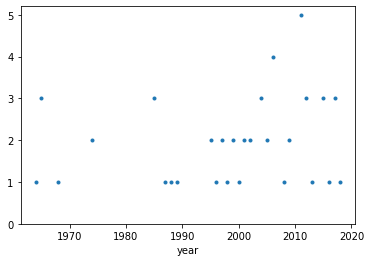

In [59]:
c = c[c.name == 'Judi Dench']
c.groupby(['year']).size().plot(ylim=0, style='.')

In [76]:
c = cast
c = c[c.name == 'Judi Dench']
c.groupby(c.year // 10 * 10).n.size()

year
1960     5
1970     2
1980     6
1990     8
2000    17
2010    17
Name: n, dtype: int64

In [10]:
c = cast
c.groupby([c.year // 10 * 10, 'type']).size()

year  type   
1890  actor           2
      actress         1
1900  actor          54
      actress        16
1910  actor       27396
      actress     15733
1920  actor       48112
      actress     23826
1930  actor      149272
      actress     49298
1940  actor      159799
      actress     50871
1950  actor      153559
      actress     56331
1960  actor      128132
      actress     54484
1970  actor      142015
      actress     60977
1980  actor      177064
      actress     80619
1990  actor      245713
      actress    115505
2000  actor      440810
      actress    235217
2010  actor      645548
      actress    382288
2020  actor         134
      actress       123
2110  actor           2
      actress         1
dtype: int64

In [37]:
c = cast
c = c[(c.character == 'Kermit the Frog') | (c.character == 'Oscar the Grouch')]
l = c.groupby(['character', c.year // 10 * 10]).size()
m = l.unstack(0).fillna(0)
m

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1.0,0.0
1980,3.0,2.0
1990,2.0,1.0
2000,1.0,1.0
2010,1.0,0.0


In [38]:
m['Kermit the Frog'] - m['Oscar the Grouch']

year
1970    1.0
1980    1.0
1990    1.0
2000    0.0
2010    1.0
dtype: float64

In [39]:
m.stack()

year  character       
1970  Kermit the Frog     1.0
      Oscar the Grouch    0.0
1980  Kermit the Frog     3.0
      Oscar the Grouch    2.0
1990  Kermit the Frog     2.0
      Oscar the Grouch    1.0
2000  Kermit the Frog     1.0
      Oscar the Grouch    1.0
2010  Kermit the Frog     1.0
      Oscar the Grouch    0.0
dtype: float64